In [1]:
#`##### import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.decomposition import PCA
import random as rd
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
import sys
import PeakDetective
import PeakDetective.detection_helper as detection_helper
import scipy.stats as stats
import seaborn as sb
import sklearn.metrics as met
import random as rd
import importlib
import pickle as pkl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib_venn import venn2


In [2]:
datadir = "D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/"
resolution = 60
window = 1.0

In [3]:
#covid_plasma_hamster
ms1ppm = 50
peakWidth = (10,93)
s2n = 9.1
noise = 100
mzDiff = 0.0045
prefilter = 3
cutoff=0.8

In [4]:
det = detection_helper.PeakList()
#det.runXCMS(datadir, "xcms_peak_list.csv", "negative", ms1ppm, peakWidth,s2n=s2n,noise=noise,mzDiff=mzDiff,prefilter=prefilter)
det.readXCMSPeakList(datadir+"xcms_peak_list.csv")
peakList = pd.DataFrame(det.peakList)
peakList

,mz,rt,rt_start,rt_end,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,...,P H-476_6540.mzML,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML
FT0001,52.979938,5.065533,4.959100,5.148091,0.000000,0.000000,0.00000,150837.234745,194413.486705,182357.676981,...,2419.482741,1820.433074,121797.502091,195846.665674,114430.629898,1937.777705,182139.139394,114782.838173,114799.397706,142320.714386
FT0002,52.979845,4.829960,4.693100,4.865565,0.000000,930.129534,0.00000,55655.981332,63525.648336,49132.620413,...,109236.614651,84843.231735,22774.304380,64173.831871,100585.428765,63480.555059,62156.151168,84918.766147,89546.492561,92590.937847
FT0003,52.979639,1.756369,1.674209,1.810926,10837.656774,9208.201589,12363.55156,11387.833288,8725.272745,9047.622786,...,8375.259893,8291.012390,10633.587115,7078.631853,7309.740413,6751.376184,9682.674564,11268.998269,9743.546611,5944.375184
FT0004,54.976962,5.079406,5.032442,5.131516,0.000000,0.000000,0.00000,74036.348212,41823.759345,51858.992980,...,49015.141344,20003.029397,35633.679575,45166.144803,73630.910579,43578.022167,41149.599339,37987.034083,72841.246410,53434.623720
FT0005,54.977004,4.967265,4.884650,4.992359,339.382945,317.488548,0.00000,69324.270557,30759.487873,68950.167360,...,89538.583851,41074.662200,68834.907446,68240.561387,70451.410203,62088.814024,61248.727906,72242.389613,74849.131179,75693.880596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,1696.074555,0.760348,0.750980,0.769717,0.000000,0.000000,0.00000,1316.403455,0.000000,0.000000,...,4058.218594,3856.990736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,611.279493,936.082754
FT8294,1697.082626,0.760141,0.753100,0.767181,0.000000,0.000000,0.00000,2366.984688,0.000000,0.000000,...,4407.592237,3625.982775,0.000000,0.000000,0.000000,612.094990,0.000000,1241.825246,818.126266,1252.142480
FT8295,1698.089255,0.760348,0.750980,0.769717,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,3290.152508,4272.630885,0.000000,0.000000,0.000000,0.000000,0.000000,536.399392,614.059340,697.266852
FT8296,1699.086468,0.767181,0.767181,0.767181,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,2929.793620,1291.343466,0.000000,0.000000,0.000000,0.000000,0.000000,719.981859,0.000000,0.000000


In [5]:
files = [x for x in os.listdir(datadir) if ".mzML" in x]
files.reverse()
print(files)
raw_data = []
for file in files:
    temp = PeakDetective.rawData()
    temp.readRawDataFile(datadir + file,ms1ppm)
    raw_data.append(temp)


['QC-P pool-4_6540.mzML', 'QC-P pool-3_6540.mzML', 'QC-P pool-2_6540.mzML', 'P H-514_6540.mzML', 'P H-507_6540.mzML', 'P H-488_6540.mzML', 'P H-487_6540.mzML', 'P H-482_6540.mzML', 'P H-480_6540.mzML', 'P H-476_6540.mzML', 'P H-472_6540.mzML', 'P H-471_6540.mzML', 'P H-469 -2 _6540.mzML', 'P H-464_6540.mzML', 'blank-3_6540.mzML', 'blank-2_6540.mzML', 'blank-1_6540.mzML']


In [6]:
integ = PeakDetective.PeakDetective(numCores = 20,resolution=resolution)

In [8]:
if __name__ == "__main__":
    rts = peakList["rt"].values
    X = integ.makeDataMatrix(raw_data[:2],peakList["mz"],rts,align=True)

forming matrix |██████████████████████████████████████████████████| 100.0% 
aligning EICs |██████████████████████████████████████████████████| 100.0% 


In [9]:
#if __name__ == "__main__":
#    X_signal = integ.generateSignalPeaks(peakList,raw_data[:1],n=100)
#    X_noise = integ.generateFalsePeaks(peakList,raw_data[:1],n=100)
#    X_syn = np.concatenate((X_signal,X_noise),axis=0)
#    y_syn = np.array([[0.0,1.0] for _ in X_signal] + [[1.0,0.0] for _ in X_noise])

In [10]:
pkl.dump([X],open(datadir + "model_selection_data.pkl","wb"))

In [7]:
[X] = pkl.load(open(datadir + "model_selection_data.pkl","rb"))

In [ ]:
if __name__ == "__main__":
    integ.trainSmoother(peakList,raw_data,100000,10,64,0.1)

In [15]:
integ.save(datadir + "smoothed_only/")

In [8]:
integ.load(datadir + "smoothed_only/")

1/1 [==============================] - 0s 29ms/step
loss: 0.430372029542923 mean_absolute_error: 0.23898868262767792 val loss: 0.5092035531997681 val_mean_absolute_error: 0.23723824322223663 numEpochs: 204
515/515 [==============================] - 1s 1ms/step


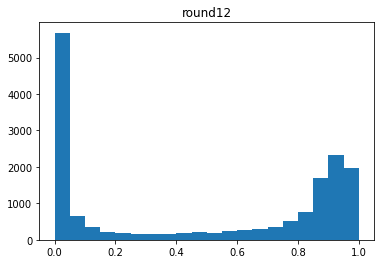

16464 unclassified features remaining
Continue with another iteration? (1=Yes, 0=No): 


 0


1/1 [==============================] - 0s 25ms/step


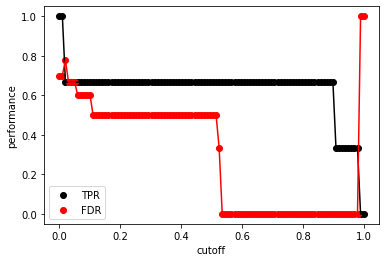

In [9]:
if __name__ == "__main__":
    integ.trainClassifierActive(X,[],[],200,1000,4,1,numVal = 10,numManualPerRound=10,inJupyter=True)

In [9]:
cutoff=0.8

In [11]:
integ.save(datadir + "active/")

In [8]:
integ.load(datadir + "active/")

In [9]:
if __name__ == "__main__":
    peak_curated,peak_scores,peak_intensities = integ.curatePeaks(raw_data,peakList,threshold=cutoff,align=True)
    peak_curated

generating EICs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
aligning EICs |██████████████████████████████████████████████████| 100.0% 
4408/4408 [==============================] - 6s 1ms/step
integrating peaks...
integrating peaks |██████████████████████████████████████████████████| 100.0% 


In [10]:
peak_curated.to_csv(datadir + "peak_curated.csv")
peak_scores.to_csv(datadir + "peak_scores.csv")
peak_intensities.to_csv(datadir + "peak_intensities.csv")

In [11]:
peak_curated = pd.read_csv(datadir + "peak_curated.csv",index_col=0)
peak_scores = pd.read_csv(datadir + "peak_scores.csv",index_col=0)
peak_intensities = pd.read_csv(datadir + "peak_intensities.csv",index_col=0)

In [12]:
peak_curated

,mz,rt,rt_start,rt_end,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,...,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML
FT0001,52.979938,5.065533,4.959100,5.148091,0.000000,0.000000,0.00000,150837.234745,194413.486705,182357.676981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
FT0002,52.979845,4.829960,4.693100,4.865565,0.000000,930.129534,0.00000,55655.981332,63525.648336,49132.620413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FT0003,52.979639,1.756369,1.674209,1.810926,10837.656774,9208.201589,12363.55156,11387.833288,8725.272745,9047.622786,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
FT0004,54.976962,5.079406,5.032442,5.131516,0.000000,0.000000,0.00000,74036.348212,41823.759345,51858.992980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
FT0005,54.977004,4.967265,4.884650,4.992359,339.382945,317.488548,0.00000,69324.270557,30759.487873,68950.167360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,1696.074555,0.760348,0.750980,0.769717,0.000000,0.000000,0.00000,1316.403455,0.000000,0.000000,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
FT8294,1697.082626,0.760141,0.753100,0.767181,0.000000,0.000000,0.00000,2366.984688,0.000000,0.000000,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
FT8295,1698.089255,0.760348,0.750980,0.769717,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
FT8296,1699.086468,0.767181,0.767181,0.767181,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
y = integ.classifyMatrix(X)

519/519 [==============================] - 1s 1ms/step


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


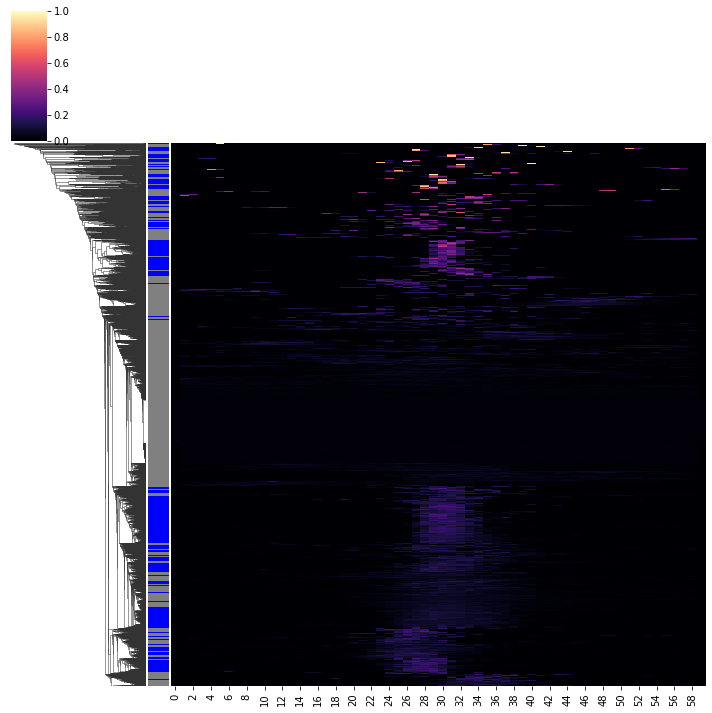

In [14]:
def tmp(val):
    if val > cutoff:
        return "blue"
    return "grey"
row_colors = [tmp(x) for x in y[:len(peakList),1]]
sb.clustermap(PeakDetective.normalizeMatrix(X[:len(peakList)]),col_cluster=False,yticklabels=False,cmap="magma",vmin=0.0,vmax=1.0,row_colors=row_colors)

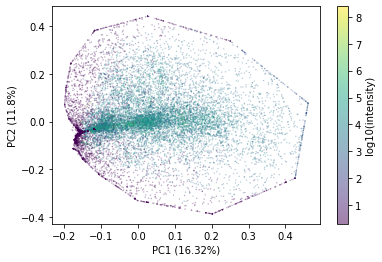

In [15]:
pca = PCA(2)
loads = pca.fit_transform(PeakDetective.normalizeMatrix(X))
plt.scatter(loads[:,0],loads[:,1],c=np.log10(np.array([np.max([2, PeakDetective.integratePeak(x)]) for x in X])),s=.1,alpha=.5)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
#plt.xlim((-.5,.5))
plt.colorbar(label="log10(intensity)")

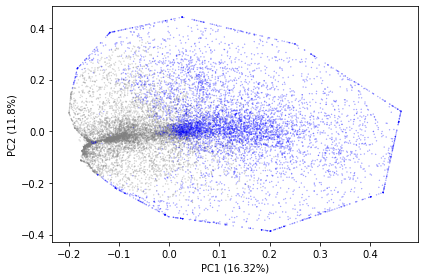

In [16]:
pca = PCA(2)
loads = pca.fit_transform(PeakDetective.normalizeMatrix(X))
colormap = LinearSegmentedColormap.from_list("test",colors=["grey", "blue"],N=256)
def getColor(v):
    if v > cutoff:
        return "blue"
    else:
        return "grey"
colors = [getColor(x) for x in y[:,1]]
#plt.scatter(loads[:,0],loads[:,1],c=y[:,1],s=.1,alpha=.5,cmap=colormap)
plt.scatter(loads[:,0],loads[:,1],c=colors,s=.1,alpha=.5)

plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
#plt.xlim((-.5,.5))

#plt.colorbar(label="PeakDetective Score")
plt.tight_layout()
plt.savefig(datadir + "pca_pd.png",dpi=300)

Text(0, 0.5, '% of features')

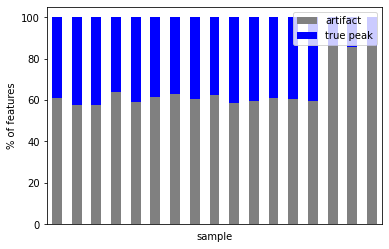

In [17]:
df = {}
for file in files:
    for index,row in peak_curated.iterrows():
        if row[datadir + file] > cutoff:
            df[len(df)] = {"sample":file,"classification":"true peak"}
        else:
            df[len(df)] = {"sample":file,"classification":"artifact"}

df = pd.DataFrame.from_dict(df,orient="index")

def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf


aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["grey","blue"])
plt.xticks([],[])
plt.ylabel("% of features")

In [18]:
xcmsCols = [x for x in peakList.columns.values if ".mzML" in x and "D:" not in x]
xcms_peak_areas = peakList[xcmsCols]
xcms_peak_areas

,blank-1_6540.mzML,blank-2_6540.mzML,blank-3_6540.mzML,P H-464_6540.mzML,P H-469 -2 _6540.mzML,P H-471_6540.mzML,P H-472_6540.mzML,P H-476_6540.mzML,P H-480_6540.mzML,P H-482_6540.mzML,P H-487_6540.mzML,P H-488_6540.mzML,P H-507_6540.mzML,P H-514_6540.mzML,QC-P pool-2_6540.mzML,QC-P pool-3_6540.mzML,QC-P pool-4_6540.mzML
FT0001,0.000000,0.000000,0.00000,150837.234745,194413.486705,182357.676981,2486.967242,2419.482741,1820.433074,121797.502091,195846.665674,114430.629898,1937.777705,182139.139394,114782.838173,114799.397706,142320.714386
FT0002,0.000000,930.129534,0.00000,55655.981332,63525.648336,49132.620413,85895.599533,109236.614651,84843.231735,22774.304380,64173.831871,100585.428765,63480.555059,62156.151168,84918.766147,89546.492561,92590.937847
FT0003,10837.656774,9208.201589,12363.55156,11387.833288,8725.272745,9047.622786,5899.952212,8375.259893,8291.012390,10633.587115,7078.631853,7309.740413,6751.376184,9682.674564,11268.998269,9743.546611,5944.375184
FT0004,0.000000,0.000000,0.00000,74036.348212,41823.759345,51858.992980,36614.956408,49015.141344,20003.029397,35633.679575,45166.144803,73630.910579,43578.022167,41149.599339,37987.034083,72841.246410,53434.623720
FT0005,339.382945,317.488548,0.00000,69324.270557,30759.487873,68950.167360,78110.782799,89538.583851,41074.662200,68834.907446,68240.561387,70451.410203,62088.814024,61248.727906,72242.389613,74849.131179,75693.880596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,0.000000,0.000000,0.00000,1316.403455,0.000000,0.000000,1717.980596,4058.218594,3856.990736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,611.279493,936.082754
FT8294,0.000000,0.000000,0.00000,2366.984688,0.000000,0.000000,1998.236755,4407.592237,3625.982775,0.000000,0.000000,0.000000,612.094990,0.000000,1241.825246,818.126266,1252.142480
FT8295,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1508.581696,3290.152508,4272.630885,0.000000,0.000000,0.000000,0.000000,0.000000,536.399392,614.059340,697.266852
FT8296,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2929.793620,1291.343466,0.000000,0.000000,0.000000,0.000000,0.000000,719.981859,0.000000,0.000000


In [19]:
pdCols = [x for x in peak_intensities.columns.values if ".mzML" in x and "D:" in x]
pd_peak_areas = peak_intensities[pdCols]
pd_peak_areas

,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-4_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/QC-P pool-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-514_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-507_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-488_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-487_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-482_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-480_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-476_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-472_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-471_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-469 -2 _6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/P H-464_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-3_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-2_6540.mzML,D:/PeakDetective/data/hamster_plasma/polar_neg/ms1/blank-1_6540.mzML
FT0001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FT0002,199260.244049,176691.110329,169735.339047,160264.877509,171140.336834,188084.082483,163958.066202,159775.160454,177786.415982,216646.727479,172170.157968,186354.127664,168537.817941,176925.185522,1273.808725,1429.174826,366.502897
FT0003,6042.137215,5511.689111,8118.874756,5887.192801,5235.630726,6383.918801,6640.271303,7854.044876,7090.022841,5666.171735,6383.466951,6504.101065,7227.194120,7429.258504,6934.021471,7190.976239,7709.595265
FT0004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FT0005,66117.834668,59847.053678,63519.963725,54287.966383,56101.774695,63472.008468,60547.078054,58216.600883,63670.100195,80117.214694,70690.919194,67674.880652,60804.268012,63783.693233,0.000000,309.353945,698.892329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT8293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FT8294,1085.833077,1051.527905,2082.383129,0.000000,790.612782,0.000000,0.000000,0.000000,3340.759181,3290.514330,2358.765129,0.000000,0.000000,2588.241062,0.000000,0.000000,0.000000
FT8295,489.029229,632.801443,253.294389,0.000000,0.000000,0.000000,0.000000,0.000000,2019.421199,1707.258115,1006.258737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FT8296,0.000000,350.898172,753.010540,0.000000,0.000000,0.000000,0.000000,0.000000,2659.881950,2366.965176,927.946488,0.000000,0.000000,308.612948,0.000000,0.000000,0.000000


(0.7611401907198051, 0.0)

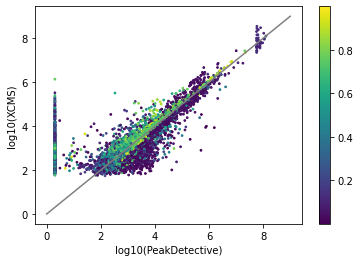

In [20]:
plt.scatter(np.log10(pd_peak_areas.values.mean(axis=1)+2),np.log10(xcms_peak_areas.values.mean(axis=1)+2),s=3,c=peak_scores[pdCols].values.mean(axis=1))
plt.plot([0,9],[0,9],color="grey")
plt.xlabel("log10(PeakDetective)")
plt.ylabel("log10(XCMS)")
plt.colorbar()
stats.pearsonr(pd_peak_areas.values.mean(axis=1),xcms_peak_areas.values.mean(axis=1))

In [ ]:
if __name__ == "__main__":
    peak_scores_pd_det, peak_intensities_pd_det,rois = integ.detectPeaks(raw_data, cutoff=cutoff, intensityCutoff = 500,numDataPoints=3,window=0.1,align=True,detectFrac=0.5)

Detecting ROIs |██████████████████████████------------------------| 52.8% 8376 ROIs found

In [ ]:
peak_scores_pd_det

In [ ]:
peak_intensities_pd_det

In [ ]:
peak_intensities_pd_det.to_csv(datadir + "peak_intensities_pd_det.csv")
peak_scores_pd_det.to_csv(datadir + "peak_scores_pd_det.csv")
pkl.dump(rois,open(datadir+"rois.pkl","wb"))

In [ ]:
peak_intensities_pd_det = pd.read_csv(datadir + "peak_intensities_pd_det.csv",index_col=0) 
peak_scores_pd_det = pd.read_csv(datadir + "peak_scores_pd_det.csv",index_col=0)
rois = pkl.load(open(datadir+"rois.pkl","rb"))

In [ ]:
pdCols = [x for x in peak_intensities_pd_det.columns.values if ".mzML" in x and "D:" in x]# and "lank" not in x]
pdCols

In [ ]:
plt.hist(np.log10(peak_intensities_pd_det[pdCols].values.flatten()+2),bins=100)
pass

In [ ]:
pd_peak_list = detection_helper.PeakList()
pd_peak_list.from_df(peak_intensities_pd_det,pdCols)
pd_peak_list.peakList

In [ ]:
pd_peak_list.imputeRowMin(pdCols)

In [ ]:
plt.hist(np.log10(pd_peak_list.peakList[pdCols].values.flatten()),bins=100)
pass

In [ ]:
## pd_peak_list 
pd_peak_list.peakList

In [ ]:
det = detection_helper.PeakList()
det.readXCMSPeakList(datadir+"xcms_peak_list.csv")
det.peakList

In [ ]:
research_samps = [x for x in peak_scores.columns.values if "D:" in x]
toDrop = []
rois.sort()
for index,row in det.peakList.iterrows():
    if np.sum(peak_scores.loc[index,research_samps].values > cutoff) < float(len(research_samps)/2):# or np.sum(peak_intensities.loc[index,research_samps].values < 1000) < len(research_samps)/2 :
        toDrop.append(index)
    if 1e6 * np.abs(row["mz"]-PeakDetective.take_closest(rois,row["mz"]))/row["mz"] > ms1ppm:
        pass#toDrop.append(index)
det.peakList = det.peakList.drop(toDrop,axis=0)
det.peakList

In [ ]:
#get overlap 
overlap = detection_helper.mergePeakLists([pd_peak_list.peakList,det.peakList],["PeakDetective","XCMS"],ms1ppm,0.25)
overlap

In [ ]:
venn2([set(overlap[overlap["PeakDetective"] > 0.5].index.values),set(overlap[overlap["XCMS"] > 0.5].index.values)],set_labels=["PeakDetective","XCMS"],set_colors=["green","grey"])
plt.tight_layout()
plt.savefig(datadir + "venn_feats.png",dpi=300)

In [ ]:
pd_only_feats = overlap[(overlap["PeakDetective"] > 0.5) & (overlap["XCMS"] < 0.5)].sort_values(by="mz").set_index("index")
pd_only_feats

In [ ]:
allPdFeats = overlap[overlap["PeakDetective"] > 0.5].sort_values(by="mz").set_index("index")
allPdFeats

In [ ]:
pd_peak_list.backgroundSubtract(["lank"],["QC"],3)
pd_peak_list.peakList

In [ ]:
backgroundFeats = list(set(allPdFeats.index.values) - set(pd_peak_list.peakList.index.values))
print(backgroundFeats[:5],len(backgroundFeats))

In [ ]:
research_samps = [x for x in pd_peak_list.sampleCols if "QC" not in x and "lank" not in x]
research_samps

In [ ]:
if __name__ == "__main__":
    pd_peak_list.removeRedundancy(0.5,0.5,"negative",10,ms1ppm,sampleCols=research_samps)


In [ ]:
degenFeats = list(set(allPdFeats.index.values) - set(pd_peak_list.peakList.index.values) - set(backgroundFeats))
print(degenFeats[:5],len(degenFeats))

In [ ]:
pd_peak_list.logTransform(pdCols)

In [ ]:
pd_feats = pd_peak_list.peakList[pd_peak_list.sampleCols]
pd_feats = pd_feats.rename(mapper={x:x.replace(datadir,"") for x in pd_feats.columns.values},axis=1)
pd_feats

In [ ]:
pd_feats = pd_peak_list.peakList[pd_peak_list.sampleCols]
pd_feats = pd_feats.rename(mapper={x:x.replace(datadir,"") for x in pd_feats.columns.values},axis=1)
pd_feats

In [ ]:
sampleInfo = pd.read_csv(datadir + "../../config/metadata.csv",index_col=0)
sampleInfo

In [ ]:
groups = ["Mock","SARS-CoV-2"]
samples = [sampleInfo[sampleInfo["group"] == group]["polar_neg"].values for group in groups]
names = [[group+"_"+str(rep) for rep in range(len(samp))] for group,samp in zip(groups,samples)] 

In [ ]:
sigMetsPD = []
for index,row in pd_feats.iterrows():
    p,stat = stats.ttest_ind(row[samples[0]],row[samples[1]],equal_var=False)
    if p <  0.05/len(pd_feats) and np.abs(np.mean(row[samples[1]])-np.mean(row[samples[0]])) > 0.5:
        sigMetsPD.append(index)
pd_feats.loc[sigMetsPD,:]

In [ ]:
nonSigMets = [x for x in pd_feats.index.values if x not in sigMetsPD]

In [ ]:
plt.pie([len([x for x in backgroundFeats if x in pd_only_feats.index.values]),
         len([x for x in degenFeats if x in pd_only_feats.index.values]),
         len([x for x in sigMetsPD if x in pd_only_feats.index.values]),
         len([x for x in nonSigMets if x in pd_only_feats.index.values])],
        labels=["contaminants","degeneracies","unique compounds (stat. sig.)","unique compounds (non-stat. sig.)"],autopct='%1.1f%%',textprops={"fontsize":12})#,colors=["yellow","grey","green","blue"])

plt.figure()
plt.pie([len([x for x in backgroundFeats if x in pd_only_feats.index.values]),
         len([x for x in degenFeats if x in pd_only_feats.index.values]),
         len([x for x in sigMetsPD if x in pd_only_feats.index.values]),
         len([x for x in nonSigMets if x in pd_only_feats.index.values])],
        autopct='%1.1f%%',textprops={"fontsize":12})#,colors=["yellow","grey","green","blue"])
plt.tight_layout()
plt.savefig(datadir + "pie_chart.png",dpi=300)

In [ ]:
# research_samps = [x for x in det.sampleCols if "QC" not in x and "lank" not in x]
# research_samps

In [187]:
# det.imputeRowMin(det.sampleCols)

In [188]:
# det.backgroundSubtract(["lank"],["QC"],3)
# det.peakList

In [189]:
# if __name__ == "__main__":
#     det.removeRedundancy(0.9,0.5,"negative",10,ms1ppm,sampleCols=research_samps)

In [190]:
# det.logTransform(det.sampleCols)

In [191]:
# xcms_peaks_filt = det.peakList[det.sampleCols]
# xcms_peaks_filt

In [209]:
# sigMetsXCMS = []
# for index,row in xcms_peaks_filt.iterrows():
#     p,stat = stats.ttest_ind(row[samples[0]],row[samples[1]],equal_var=False)
    
#     if p <  0.05 and np.abs(np.mean(row[samples[1]])-np.mean(row[samples[0]])) > 1.0:
#         sigMetsXCMS.append(index)
# xcms_peaks_filt.loc[sigMetsXCMS,:]

In [ ]:
def plot_overlayedEIC(rawdatas,mz,rt_start,rt_end,resolution=60,smoothing=0,alpha=0.3,colors=None):
    ts = np.linspace(rt_start,rt_end,resolution)
    for x,data in enumerate(rawdatas):
        s = data.interpolate_data(mz,rt_start,rt_end)
        ints  = [np.max([x,0]) for x in s(ts)]
        if colors is None:
            plt.plot(ts,ints,alpha=alpha)
        else:
            plt.plot(ts,ints,alpha=alpha,color=colors[x])

In [ ]:
tmpRawData = []
colors = []
for samps,color in zip(samples,["red","blue"]):
    for x in samps:
        for y in raw_data:
            if x in y.filename:
                tmpRawData.append(y)
                colors.append(color)
                print(x,y.filename)

In [ ]:
ind = rd.choice([x for x in sigMetsPD if x in pd_only_feats.index.values])
mz = pd_peak_list.peakList.at[ind,"mz"]
rt = pd_peak_list.peakList.at[ind,"rt"]
rt_start = rt-0.5
rt_end = rt+0.5
plot_overlayedEIC(tmpRawData,mz,rt_start,rt_end,resolution=60,alpha=0.3,colors=colors)
plt.title(mz)
plt.xlabel("RT")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig(datadir + "example_pd_sig_feat.png",dpi=300)

In [ ]:
X = np.random.random((6,5)).sum(axis=0)
X